#Import Libraries

##other necessary libraries

In [128]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy import stats 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input,LSTM,Reshape,Conv2D,Flatten,Dropout,BatchNormalization, LeakyReLU, concatenate, GRU, GlobalMaxPooling1D, GlobalMaxPooling2D, Bidirectional

In [129]:
!pip install scikit-plot

#Read Data

##Mount Drive

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
cd '/content/drive/My Drive/Datastorm2.0_Final'

/content/drive/.shortcut-targets-by-id/1RtxekmXbmTr-Wl7EGZDMfvq-jrwL_XDt/Datastorm2.0_Final


In [144]:
!ls '/content/drive/My Drive/Datastorm2.0_Final'

'Data Dictionary.xlsx'	     policy_jul_dec_19.csv
 datastorm_agent_data.csv    submission_Wanderers.csv
 datastorm_policy_data.csv   test_data_jan_jun_20.csv
 labels_jan_jun_19.csv	     testset.csv
 labels_jul_dec_19.csv	     train_data_jan_jun_19.csv
 policy_jan_jun_19.csv	     train_data_jul_dec_19.csv
 policy_jan_jun_20.csv


##Data

In [145]:
train_data_1 = pd.read_csv('train_data_jan_jun_19.csv')
print(train_data_1.head()) 
print(train_data_1.shape)
train_data_2 = pd.read_csv('train_data_jul_dec_19.csv')
print(train_data_2.head()) 
print(train_data_2.shape)

train_labels_1 = pd.read_csv('labels_jan_jun_19.csv')
train_labels_2 = pd.read_csv('labels_jul_dec_19.csv')
print(train_labels_1.head())

test_data = pd.read_csv('test_data_jan_jun_20.csv')
print(test_data.head())
print(test_data.shape) 


test = pd.read_csv('testset.csv')
test_3 = test['map_client_cd']
test_3 = test_3.tolist()

  client_code  policy_term_avg  ...  payment_method_CASH  payment_method_CHEQUE
0     C100000             12.0  ...                    1                      1
1     C100001             20.0  ...                    0                      1
2     C100002             15.0  ...                    1                      0
3     C100003             12.0  ...                    1                      1
4     C100004             12.0  ...                    1                      0

[5 rows x 21 columns]
(24708, 21)
  client_code  policy_term_avg  ...  payment_method_CASH  payment_method_CHEQUE
0     C100000             12.0  ...                    0                      1
1     C100001             20.0  ...                    0                      1
2     C100002             15.0  ...                    1                      0
3     C100003             12.0  ...                    0                      1
4     C100004             12.0  ...                    1                      1

[5 r

In [146]:
train_data = pd.concat([train_data_1, train_data_2],axis=0)
print(train_data.shape)
train_label = pd.concat([train_labels_1, train_labels_2],axis=0)
print(train_label.shape)
train_data.pop('client_code')
train_label.pop('client_code')

test_data.pop('client_code')

(52371, 21)
(52371, 3)


0        C100000
1        C100001
2        C100002
3        C100003
4        C100004
          ...   
29148    C154448
29149    C154449
29150    C154450
29151    C154454
29152    C154455
Name: client_code, Length: 29153, dtype: object

In [147]:
train_data.head()

,policy_term_avg,Pay_mode_H,Pay_mode_M,Pay_mode_Q,Pay_mode_S,Pay_mode_Y,main_smoker,spouse_smoker,inforce_count,lapse_count,terminate_count,lap_inf_ratio,ter_inf_ratio,num_children,num_policies,num_agents,total_sum_assuared,premium_value,payment_method_CASH,payment_method_CHEQUE
0,12.0,0,1,0,0,0,0,0,4,2,0,0.5,0.0,5,1,2,275000.0,60144.0,1,1
1,20.0,0,1,0,0,0,0,0,6,0,0,0.0,0.0,5,1,1,670000.0,36264.0,0,1
2,15.0,0,0,0,0,1,0,0,6,0,0,0.0,0.0,5,1,1,225000.0,15050.0,1,0
3,12.0,1,0,0,0,0,0,0,6,0,0,0.0,0.0,5,1,1,300000.0,62464.0,1,1
4,12.0,0,0,0,0,1,0,0,6,0,0,0.0,0.0,5,1,1,500000.0,100050.0,1,0


In [148]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.33, random_state=42)
train_recom = train_label.pop('recommentation')
val_recom = val_label.pop('recommentation')

#Model Building

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, classification_report, plot_confusion_matrix, precision_score, recall_score
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [149]:

print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(test_data.shape)

(35088, 20)
(35088, 1)
(17283, 20)
(29153, 20)


##logistic regression approach

In [ ]:
model= LogisticRegression(multi_class='multinomial', solver='saga',max_iter=100) 
model.fit(train_data,train_label) 
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

##Decision Tree Classifier model approach

In [37]:
#model = DecisionTreeClassifier(max_depth=20, class_weight = 'balanced' ).fit(train_data,train_label)
#model = DecisionTreeClassifier( max_depth = 20, class_weight = 'balanced', max_features = 'log2', random_state = 8  ).fit(train_data,train_label) #hypertuned for all features
#model = DecisionTreeClassifier( max_depth = 21, class_weight = 'balanced', max_features = 'log2', random_state = 31  ).fit(train_data,train_label) #hypertuned for 28 features

model = DecisionTreeClassifier(max_depth = None, min_samples_split=17, class_weight = 'balanced', max_features = 'log2', random_state = 29  ).fit(train_data,train_label) #hypertuned for 28 features without max depth
#model = DecisionTreeClassifier( max_depth = 21, class_weight = 'balanced', max_features = 'log2', random_state = 11  ).fit(train_data,train_label) #hypertuned for 10 features
 

y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.8764819881440948
Validation accuracy : 0.835792397153272
Precision : 0.5120742364906252
Recall : 0.5541258960542866
F1-Score : 0.4965761042262472
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     16777
           1       0.05      0.25      0.08       506

    accuracy                           0.84     17283
   macro avg       0.51      0.55      0.50     17283
weighted avg       0.95      0.84      0.89     17283

Confusion Matrix
[[14316  2461]
 [  377   129]]


Confusion matrix, without normalization
[[14316  2461]
 [  377   129]]
Normalized confusion matrix
[[0.85331108 0.14668892]
 [0.74505929 0.25494071]]


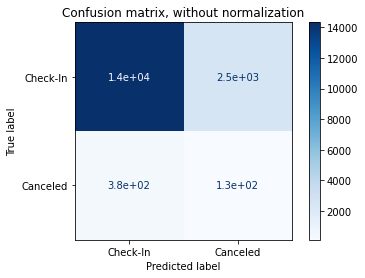

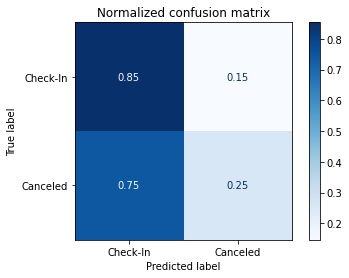

In [38]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Feature Importance
[0.12265602 0.01250049 0.01264814 0.00921889 0.00502762 0.01470026
 0.01954931 0.00091623 0.11226087 0.06421932 0.         0.11210158
 0.         0.         0.02927694 0.01741779 0.19615892 0.25531843
 0.00402558 0.01200361]


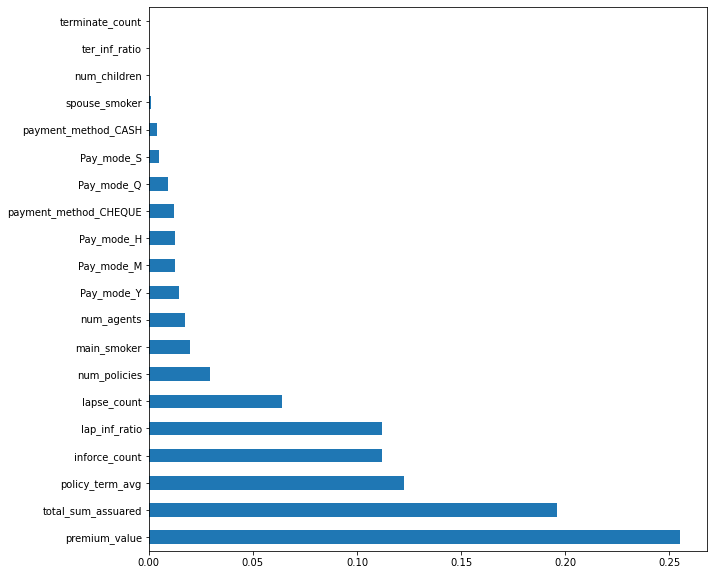

['premium_value', 'total_sum_assuared', 'policy_term_avg', 'inforce_count', 'lap_inf_ratio', 'lapse_count', 'num_policies', 'main_smoker', 'num_agents', 'Pay_mode_Y', 'Pay_mode_M', 'Pay_mode_H', 'payment_method_CHEQUE', 'Pay_mode_Q', 'Pay_mode_S', 'payment_method_CASH', 'spouse_smoker', 'num_children', 'ter_inf_ratio', 'terminate_count']
20


In [39]:
#Feature Importance in Decision Tree Classifier
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(47).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:44]
selected_features = results['columns'][:28].tolist()
print(selected_features)
print(len(selected_features))

##XGB Boost Approach

In [46]:
clf = DecisionTreeClassifier(max_depth=50, class_weight = 'balanced')
#clf = DecisionTreeClassifier( max_depth = 50, class_weight = 'balanced', max_features = 'log2', random_state = 8  )
#model=xgboost.XGBClassifier(base_estimator=clf,max_depth=20,n_estimators=15,objective='multi:softmax',gamma=4.63,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label) # day 2 second submission model
model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 22, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = 0.05, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model
#model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 19, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = 0.24, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model

y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoostError: ignored

Confusion matrix, without normalization
[[14316  2461]
 [  377   129]]
Normalized confusion matrix
[[0.85331108 0.14668892]
 [0.74505929 0.25494071]]


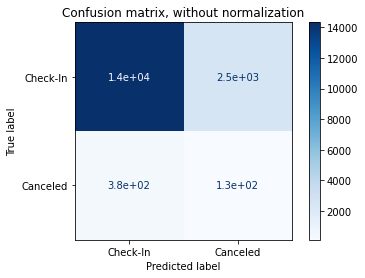

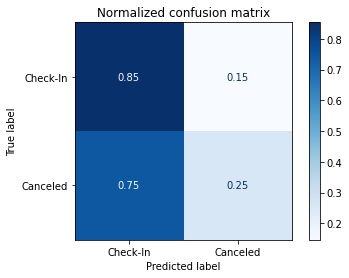

In [41]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


Feature Importance
[0.12265602 0.01250049 0.01264814 0.00921889 0.00502762 0.01470026
 0.01954931 0.00091623 0.11226087 0.06421932 0.         0.11210158
 0.         0.         0.02927694 0.01741779 0.19615892 0.25531843
 0.00402558 0.01200361]


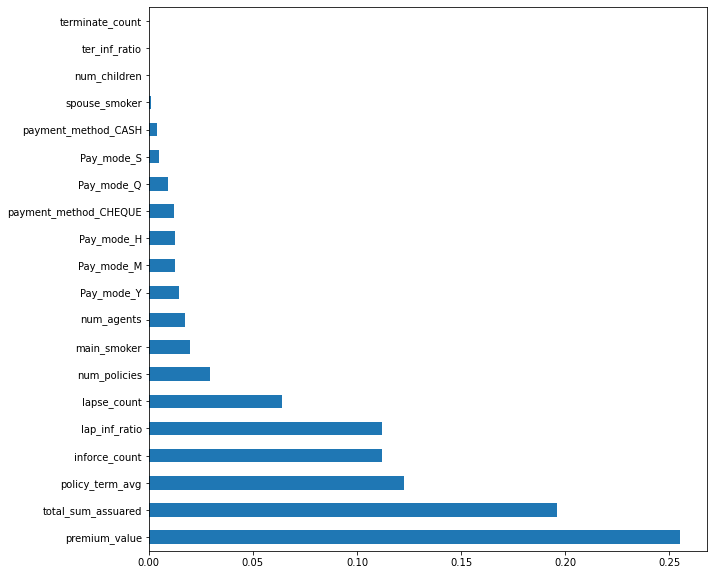

['policy_term_avg', 'inforce_count', 'lap_inf_ratio', 'lapse_count', 'num_policies', 'main_smoker', 'num_agents', 'Pay_mode_Y', 'Pay_mode_M', 'Pay_mode_H', 'payment_method_CHEQUE', 'Pay_mode_Q', 'Pay_mode_S', 'payment_method_CASH', 'spouse_smoker', 'num_children', 'ter_inf_ratio', 'terminate_count']


In [42]:
#Feature Importance in XGBoost
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[2:]
selected_features = results['columns'][2:].tolist()
print(selected_features)

##Support Vector Machine Approach

In [ ]:

model = svm.SVC(degree=5,decision_function_shape='ovo', class_weight = 'balanced')
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [ ]:
#Feature Importance in XGBoost
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[2:]
selected_features = results['columns'][2:].tolist()
print(selected_features)

##MLP classifier approach

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',learning_rate = 'adaptive',learning_rate_init=0.01,activation= 'relu', alpha=1e-6, hidden_layer_sizes=(150, ), random_state=91,max_iter=400)
model.fit(train_data,train_label) 
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.41264848038010976
Validation accuracy : 0.37140778464896324
Precision : 0.3573782652679491
Recall : 0.35776231557195876
F1-Score : 0.33108676553798505
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.42      0.50      1610
           1       0.31      0.24      0.27       741
           2       0.16      0.41      0.23       398

    accuracy                           0.37      2749
   macro avg       0.36      0.36      0.33      2749
weighted avg       0.46      0.37      0.40      2749

Confusion Matrix
[[680 322 608]
 [278 177 286]
 [162  72 164]]


##Random Forest approach

In [156]:
from sklearn.metrics import roc_auc_score
#model = RandomForestClassifier(max_depth=7,max_features=10,n_estimators=75, class_weight = 'balanced' )
model = RandomForestClassifier(max_depth = 14, n_estimators = 115, class_weight = 'balanced', random_state = 39  )
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
print(roc_auc_score(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train accuracy : 0.9529468764249887
Validation accuracy : 0.936874385234045
Precision : 0.5619137345728114
Recall : 0.5994828464811957
F1-Score : 0.5749703725268034
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16777
           1       0.15      0.24      0.18       506

    accuracy                           0.94     17283
   macro avg       0.56      0.60      0.57     17283
weighted avg       0.95      0.94      0.94     17283

Confusion Matrix
[[16070   707]
 [  384   122]]
0.5994828464811957


Confusion matrix, without normalization
[[16070   707]
 [  384   122]]
Normalized confusion matrix
[[0.95785897 0.04214103]
 [0.75889328 0.24110672]]


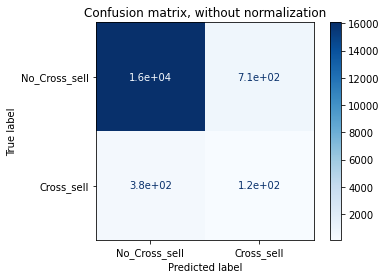

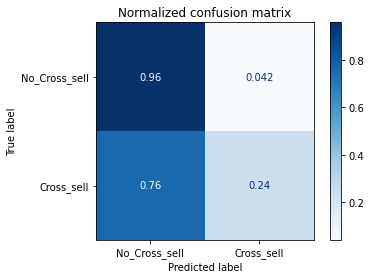

In [157]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["No_Cross_sell", "Cross_sell"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Feature Importance
[0.09942176 0.01259754 0.01406139 0.01273707 0.01431266 0.01571523
 0.01590852 0.00192377 0.12001058 0.1273923  0.         0.06988686
 0.06827505 0.         0.04670621 0.02484917 0.15450664 0.18086394
 0.00619    0.01464132]


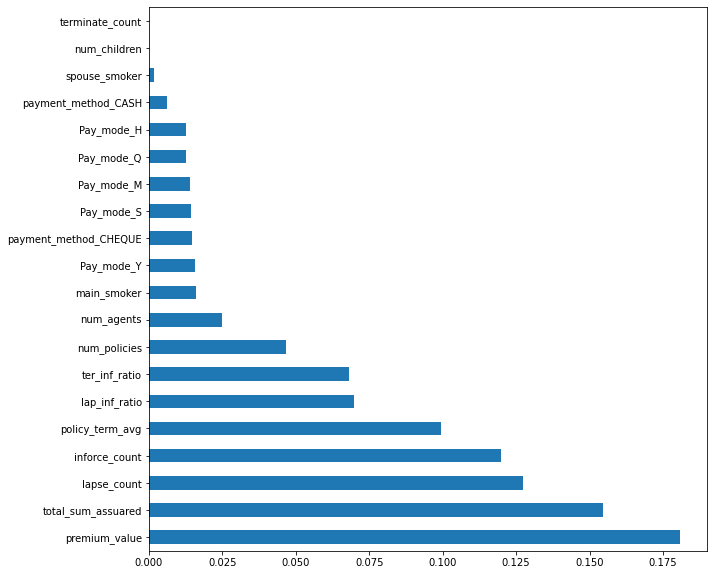

['premium_value', 'total_sum_assuared', 'lapse_count', 'inforce_count', 'policy_term_avg', 'lap_inf_ratio', 'ter_inf_ratio', 'num_policies', 'num_agents', 'main_smoker', 'Pay_mode_Y', 'payment_method_CHEQUE', 'Pay_mode_S', 'Pay_mode_M', 'Pay_mode_Q', 'Pay_mode_H', 'payment_method_CASH', 'spouse_smoker', 'num_children', 'terminate_count']


In [158]:
#Feature Importance in Random Forest
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:30]
selected_features = results['columns'][:20].tolist()
print(selected_features)

##KNN approach

In [ ]:
model=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 1.0
Validation accuracy : 0.4219716260458348
Precision : 0.3212005365678779
Recall : 0.3208768027978497
F1-Score : 0.3209910453437807
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1610
           1       0.24      0.25      0.25       741
           2       0.14      0.14      0.14       398

    accuracy                           0.42      2749
   macro avg       0.32      0.32      0.32      2749
weighted avg       0.42      0.42      0.42      2749

Confusion Matrix
[[917 475 218]
 [440 187 114]
 [233 109  56]]


Confusion matrix, without normalization
[[990 415 205]
 [426 208 107]
 [215 114  69]]
Normalized confusion matrix
[[0.61490683 0.25776398 0.12732919]
 [0.57489879 0.28070175 0.14439946]
 [0.54020101 0.28643216 0.17336683]]


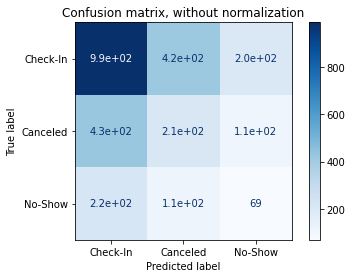

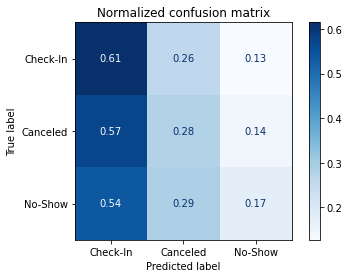

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

##Ensemble - extra tree classifier approach

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=12,n_estimators=100, class_weight = 'balanced')
model.fit(train_data, train_label)
y_predict= model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.8600638977635783
Validation accuracy : 0.45180065478355763
Precision : 0.3508459196357407
Recall : 0.3517447928151331
F1-Score : 0.35057768866857825
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      1610
           1       0.30      0.34      0.32       741
           2       0.15      0.13      0.14       398

    accuracy                           0.45      2749
   macro avg       0.35      0.35      0.35      2749
weighted avg       0.46      0.45      0.45      2749

Confusion Matrix
[[937 471 202]
 [387 252 102]
 [219 126  53]]


##Hypertuning the model

In [154]:
#Hypertuning Parameters for Accuracy F1score and AUC score
#max_depth
#learning_rate
#min_child_weight 
#gamma 4.63
#colsample_bytree
#scale_pos_weight 
#subsample
#reg_lambda
#x=np.linspace(3,25,num=23,dtype=int)
x=np.linspace(0,500,num=501,dtype=int)
train_acc = []
val_acc = []
F = []
#clf = DecisionTreeClassifier(max_depth=50, class_weight = 'balanced')
#x = [True, False]
for i in x:
     print(i)
     #model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 19, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = i, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model
     #model = DecisionTreeClassifier( max_depth = 20, class_weight = 'balanced', max_features = 'log2', random_state = 8  ).fit(train_data,train_label)
     #model = RandomForestClassifier(max_depth = 12, n_estimators = 115, class_weight = 'balanced', random_state = 39  ).fit(train_data,train_label)  # 115
     model = RandomForestClassifier(max_depth = 14, n_estimators = 115, class_weight = 'balanced', random_state = i  )
     model.fit(train_data,train_label)       
     y_pred=model.predict(val_data)
     f=f1_score(val_label,y_pred ,average='macro', zero_division=0)
     F.append(f)
     #auc=roc_auc_score(val_label,y_pred,average='macro')
     #AUC.append(auc)
     train_acc.append(model.score(train_data,train_label))
     val_acc.append(model.score(val_data,val_label))
     if f > 0.3697:
       print("improvement")
 #ploting hypertuning results
 
import matplotlib.pyplot as plt
#plt.plot(x,AUC)
#plt.title('AUC Score')
#plt.ylabel('Auc')
#plt.xlabel('Parameters')
#plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,train_acc)
plt.title('Train accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,val_acc)
plt.title('Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()

print("Maximum Training Acc : "+str(max(train_acc)))
print(x[train_acc.index(max(train_acc))])

print("Maximum Validation Acc : "+str(max(val_acc)))
print(x[val_acc.index(max(val_acc))])

print("Maximum F1 Score : "+str(max(F)))
print(x[F.index(max(F))])




0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
27


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
29


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
37


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
43


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
44


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
47


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


improvement
48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KeyboardInterrupt: ignored

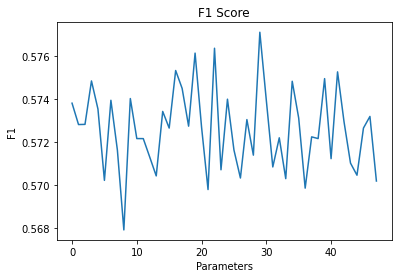

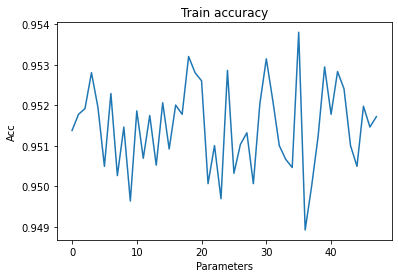

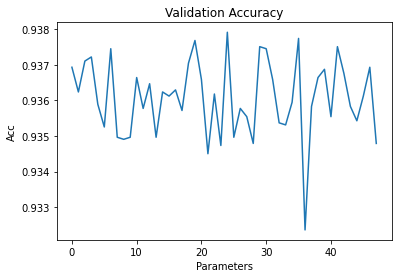

Maximum Training Acc : 0.9538018695850433
35
Maximum Validation Acc : 0.9379158710871955
24
Maximum F1 Score : 0.5771270290863194
29


In [155]:
import matplotlib.pyplot as plt
x=x[:len(F)]
#plt.plot(x,AUC)
#plt.title('AUC Score')
#plt.ylabel('Auc')
#plt.xlabel('Parameters')
#plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,train_acc)
plt.title('Train accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,val_acc)
plt.title('Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()

print("Maximum Training Acc : "+str(max(train_acc)))
print(x[train_acc.index(max(train_acc))])

print("Maximum Validation Acc : "+str(max(val_acc)))
print(x[val_acc.index(max(val_acc))])

print("Maximum F1 Score : "+str(max(F)))
print(x[F.index(max(F))])

#Prediction of Cross sell

In [81]:
y_predict_2= model.predict_proba(test_data)

y_predict_2

array([[0.89745947, 0.10254053],
       [0.6612403 , 0.3387597 ],
       [0.29446748, 0.70553252],
       ...,
       [0.72575625, 0.27424375],
       [0.76049392, 0.23950608],
       [0.74632769, 0.25367231]])

In [82]:
y_predict_2 = y_predict_2[:,1]
y_predict_2

array([0.10254053, 0.3387597 , 0.70553252, ..., 0.27424375, 0.23950608,
       0.25367231])

In [83]:
test_data = pd.read_csv('test_data_jan_jun_20.csv')
test_2 = test_data['client_code']
test_2 = test_2.tolist()
y_predict_3 = []
for i in test_3:
  if i in test_2:
    ind = test_2.index(i)
    y_predict_3.append(y_predict_2[ind])
  else:
    y_predict_3.append(0)
print(len(test_3))
print(len(y_predict_3))

19142
19142


In [84]:
y_predict_3=pd.DataFrame(y_predict_3,columns=['probability_of_cross sell'] )
y_predict_3

,probability_of_cross sell
0,0.199696
1,0.251729
2,0.074281
3,0.110502
4,0.170813
...,...
19137,0.008079
19138,0.252875
19139,0.274244
19140,0.239506


In [85]:
test = pd.concat([test, y_predict_3],axis=1)
test.head()

,map_client_cd,probability_of_cross sell
0,C100003,0.199696
1,C100004,0.251729
2,C100009,0.074281
3,C100014,0.110502
4,C100015,0.170813


In [86]:
test.to_csv('submission_Wanderers.csv',index=False)

#Recommendation

##Label Encoding

In [114]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_recom)
print(le.classes_)
train_recom=le.transform(train_recom)

#le.fit(val_recom)
#print(le.classes_)
val_recom=le.transform(val_recom)

['HEALTH' 'INVESTMENT' 'No_policy' 'PROTECTION' 'RETIREMENT']


In [117]:
#Random Forest

from sklearn.metrics import roc_auc_score
#model = RandomForestClassifier(max_depth=7,max_features=10,n_estimators=75, class_weight = 'balanced' )
model_2 = RandomForestClassifier(max_depth = 15, n_estimators = 115, class_weight = 'balanced', random_state = 39  )
model_2.fit(train_data,train_recom)       
y_predict=model_2.predict(val_data)
print("Train accuracy : "+str(model_2.score(train_data,train_recom)))
print("Validation accuracy : "+str(model_2.score(val_data,val_recom)))
print("Precision : "+str(precision_score(val_recom,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_recom,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_recom,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_recom,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_recom,y_predict))
#print(roc_auc_score(val_recom,y_predict, multi_class =  'ovo'))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.9594733242134063
Validation accuracy : 0.9371058265347452
Precision : 0.27862107380609713
Recall : 0.29503772655980687
F1-Score : 0.2826562068610149
Classification Report
              precision    recall  f1-score   support

           0       0.10      0.19      0.13       261
           1       0.04      0.03      0.03       226
           2       0.97      0.96      0.97     16777
           4       0.00      0.00      0.00        19

    accuracy                           0.94     17283
   macro avg       0.28      0.30      0.28     17283
weighted avg       0.95      0.94      0.94     17283

Confusion Matrix
[[   50     7   204     0]
 [   22     6   198     0]
 [  433   131 16140    73]
 [    4     1    14     0]]


Confusion matrix, without normalization
[[   50     7   204     0]
 [   22     6   198     0]
 [  433   131 16140    73]
 [    4     1    14     0]]
Normalized confusion matrix
[[0.19157088 0.02681992 0.7816092  0.        ]
 [0.09734513 0.02654867 0.87610619 0.        ]
 [0.02580914 0.00780831 0.96203135 0.0043512 ]
 [0.21052632 0.05263158 0.73684211 0.        ]]


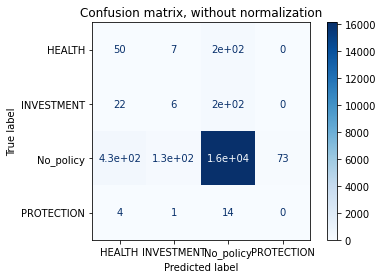

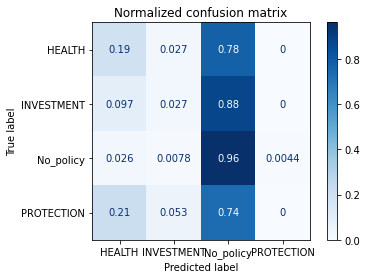

In [121]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['HEALTH', 'INVESTMENT' ,'No_policy', 'PROTECTION', 'RETIREMENT']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_2, val_data, val_recom,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Feature Importance
[0.10298084 0.01234239 0.01499221 0.01259209 0.01253874 0.01543847
 0.01682577 0.00192068 0.12013915 0.12107548 0.         0.06675741
 0.06358962 0.         0.04451793 0.02529046 0.1581407  0.18944334
 0.00634311 0.01507161]


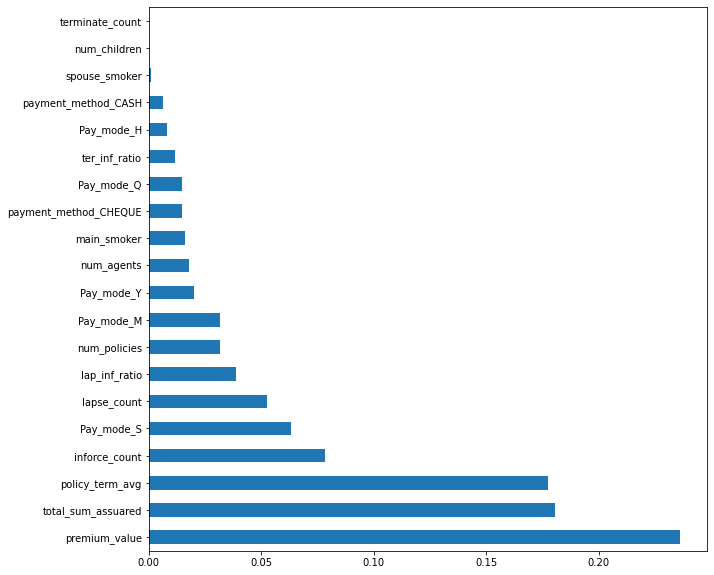

['premium_value', 'total_sum_assuared', 'policy_term_avg', 'inforce_count', 'Pay_mode_S', 'lapse_count', 'lap_inf_ratio', 'num_policies', 'Pay_mode_M', 'Pay_mode_Y', 'num_agents', 'main_smoker', 'payment_method_CHEQUE', 'Pay_mode_Q', 'ter_inf_ratio', 'Pay_mode_H', 'payment_method_CASH', 'spouse_smoker', 'num_children', 'terminate_count']


In [119]:
#Feature Importance in Random Forest
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model_2.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model_2.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:30]
selected_features = results['columns'][:20].tolist()
print(selected_features)

In [122]:
recom_predict = model_2.predict(test_data)
recom_predict

array([2, 2, 0, ..., 2, 2, 2])

In [123]:
recom_predict =le.inverse_transform(recom_predict)
recom_predict

array(['No_policy', 'No_policy', 'HEALTH', ..., 'No_policy', 'No_policy',
       'No_policy'], dtype=object)

In [125]:
test_data = pd.read_csv('test_data_jan_jun_20.csv')
test_2 = test_data['client_code']
test_2 = test_2.tolist()
recom_predict_3 = []
for i in test_3:
  if i in test_2:
    ind = test_2.index(i)
    recom_predict_3.append(recom_predict[ind])
  else:
    recom_predict_3.append('No_policy')
print(len(test_3))
print(len(recom_predict_3))

19142
19142


In [126]:
recom_predict_3=pd.DataFrame(recom_predict_3,columns=['recommendation'] )
recom_predict_3.head()

,recommendation
0,No_policy
1,No_policy
2,No_policy
3,No_policy
4,No_policy


In [127]:
test_2 = pd.concat([test, recom_predict_3],axis=1)
test_2.head()

,map_client_cd,recommendation
0,C100003,No_policy
1,C100004,No_policy
2,C100009,No_policy
3,C100014,No_policy
4,C100015,No_policy


In [ ]:
test.to_csv('submission_Wanderers_(with recommendation).csv',index=False)